# 1. Supervised learning - 1.1 Linear models

### https://scikit-learn.org/stable/modules/linear_model.html

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if  $\hat{y}$ is the predicted value.
$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$ 

Across the module, we designate the vector w = (w1, ..., wp) as coef_ and w0 as intercept_.

To perform classification with generalized linear models, see Logistic regression.

In [49]:
# Latex사용은 $ $로 묶거나 $$ $$ 로 묶어서 사용

## 1.1.1. Ordinary Least Squares

LinearRegression fits a linear model with coefficients  $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

$$ \min_{w} || X w - y||_2^2  $$

LinearRegression will take in its fit method arrays X, y and will store the coefficients w of the linear model in its coef_ member:

In [50]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression()

In [51]:
reg.coef_

array([0.5, 0.5])

The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix X have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

multicollinearity: 다중공선성문제는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제. 독립변수들간에 정확한 선형관계가 존재하는 완전공선성의 경우와 독립변수들간에 높은 선형관계가 존재하는 다중공선성으로 구분. 회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석시 부정적인 영향을 미치는 현상

In [52]:
%matplotlib inline


# Linear Regression Example
The example below uses only the first feature of the `diabetes` dataset,
in order to illustrate the data points within the two-dimensional plot.
The straight line can be seen in the plot, showing how linear regression
attempts to draw a straight line that will best minimize the
residual sum of squares between the observed responses in the dataset,
and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of
determination are also calculated.


In [53]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
datasets

<module 'sklearn.datasets' from 'C:\\Users\\cool-com\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\__init__.py'>

In [54]:
linear_model

<module 'sklearn.linear_model' from 'C:\\Users\\cool-com\\anaconda3\\lib\\site-packages\\sklearn\\linear_model\\__init__.py'>

In [55]:
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>

In [56]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [57]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X  # 442*10

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cool-com\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\diabetes_data.csv.gz'

In [ ]:
diabetes_y  # 442*1

In [58]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2] # 3번째 열로 새축 구성
diabetes_X

NameError: name 'diabetes_X' is not defined

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [59]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [60]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

NameError: name 'diabetes_X_train' is not defined

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)

In [61]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

NameError: name 'diabetes_y_test' is not defined

In [ ]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# 1.1.2. Ridge regression and classification

## 1.1.2.1. Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

$$ \min_{w} || X w - y||_2^2 + \alpha ||w||_2^2 $$

The complexity parameter $ \alpha \geq 0 $ controls the amount of shrinkage: the larger the value of $ \alpha $, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

As with other linear models, Ridge will take in its fit method arrays X, y and will store the coefficients $ w $  of the linear model in its coef_ member:

In [62]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5)

In [63]:
reg.coef_

array([0.34545455, 0.34545455])

In [64]:
reg.intercept_

0.1363636363636364

Note that the class Ridge allows for the user to specify that the solver be automatically chosen by setting solver="auto". When this option is specified, Ridge will choose between the "lbfgs", "cholesky", and "sparse_cg" solvers. Ridge will begin checking the conditions shown in the following table from top to bottom. If the condition is true, the corresponding solver is chosen.

### Solver,          Condition

### ‘lbfgs’,          The positive=True option is specified.

### ‘cholesky’,   The input array X is not sparse.

### ‘sparse_cg’,  None of the above conditions are fulfilled.

In [65]:
%matplotlib inline


# Plot Ridge coefficients as a function of the regularization

Shows the effect of collinearity in the coefficients of an estimator.

.. currentmodule:: sklearn.linear_model

:class:`Ridge` Regression is the estimator used in this example.
Each color represents a different feature of the
coefficient vector, and this is displayed as a function of the
regularization parameter.

This example also shows the usefulness of applying Ridge regression
to highly ill-conditioned(조건이 나쁜) matrices. For such matrices, a slight
change in the target variable can cause huge variances in the
calculated weights. In such cases, it is useful to set a certain
regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the
squared loss function(손실함수, 평균제곱근오차) and the coefficients tend to zero.
At the end of the path, as alpha tends toward zero
and the solution tends towards the ordinary least squares, coefficients
exhibit big oscillations(진동). In practise it is necessary to tune alpha
in such a way that a balance is maintained between both.


In [66]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [67]:
np.arange(0, 10)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [68]:
(np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [69]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [70]:
y = np.ones(10)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Compute paths



In [71]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
alphas

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [72]:
alphas.shape

(200,)

In [73]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
ridge

Ridge(alpha=0.01, fit_intercept=False)

In [74]:
coefs

[array([   2.64506158,  -27.60370165,    7.99285619,  133.67551402,
          18.04324615, -123.85505338, -175.62009081, -113.78634109,
          45.15378754,  274.02305851]),
 array([   2.77495224,  -30.1209692 ,   17.90672494,  125.42571617,
          10.71783546, -122.86634349, -168.64642961, -106.59634373,
          46.70074869,  265.22301165]),
 array([   2.8964128 ,  -32.48097779,   27.21871697,  117.65917064,
           3.83377586, -121.92542172, -162.0788977 ,  -99.83164507,
          48.15084232,  256.93547839]),
 array([   3.0095957 ,  -34.68696546,   35.94231884,  110.36420355,
          -2.61959776, -121.0307006 , -155.90694738,  -93.48139569,
          49.50638918,  249.14682982]),
 array([   3.11468948,  -36.74289336,   44.09395174,  103.52651939,
          -8.65489592, -120.18030045, -150.11799678,  -87.5326181 ,
          50.77012538,  241.84083979]),
 array([   3.21190939,  -38.65326602,   51.69224979,   97.12992087,
         -14.28643035, -119.37200469, -144.69786258,

In [75]:
a

0.01

## Display results



<AxesSubplot:>

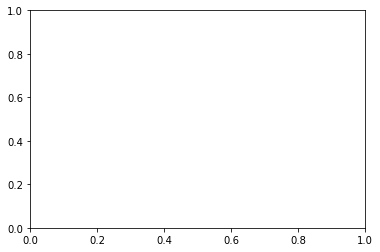

In [76]:
ax = plt.gca() # 현재 Axes 객체를 반환
ax

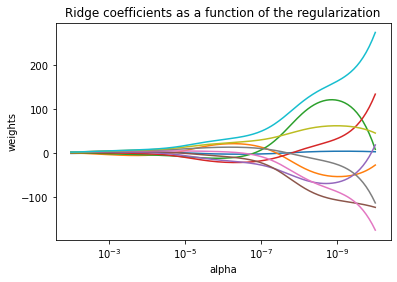

In [77]:
ax = plt.gca() # 현재 Axes 객체를 반환
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight") # 'tight': 모든 데이터를 볼 수 있을 정도로 축의 범위를 충분히 크게 설정
plt.show()

## 1.1.2.2. Classification

The Ridge regressor has a classifier variant: RidgeClassifier. This classifier first converts binary targets to {-1, 1} and then treats the problem as a regression task, optimizing the same objective as above. The predicted class corresponds to the sign of the regressor’s prediction. For multiclass classification, the problem is treated as multi-output regression, and the predicted class corresponds to the output with the highest value.
Penalized Regression(규제): 부가정보를 손실에 대해 과대적합 문제를 방지하는 방법, 복잡도에 대한 페널티를 유도해 모델 파라미터의 값을 감소
It might seem questionable to use a (penalized) Least Squares loss to fit a classification model instead of the more traditional logistic or hinge losses. However, in practice, all those models can lead to similar cross-validation scores in terms of accuracy or precision/recall, while the penalized least squares loss used by the RidgeClassifier allows for a very different choice of the numerical solvers with distinct computational performance profiles.

The RidgeClassifier can be significantly faster than e.g. LogisticRegression with a high number of classes because it can compute the projection matrix $ (X^T X)^{-1} X^T $ only once.

This classifier is sometimes referred to as a Least Squares Support Vector Machines with a linear kernel.

### plot_linear_model_coefficient_interpretation.ipynb에서